In [7]:
#import QuTiP

!pip install qutip matplotlib numpy IPython
import qutip
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image
from qutip import (Qobj, about, basis, coherent, coherent_dm, create, destroy,
                   expect, fock, fock_dm, mesolve, qeye, sigmax, sigmay,
                   sigmaz, tensor, thermal_dm, anim_matrix_histogram,
                   anim_fock_distribution, gates, plot_fock_distribution, Bloch)
#set a parameter to see animations in line
from matplotlib import rc

Looking in indexes: https://****@artifacts.uberinternal.com/artifactory/api/pypi/pypi/simple/


In [8]:
#creating an entangled TLS (bell state)

tls = tensor(basis(2,0), basis(2,0))
#visualise the tls

#apply hadamard on first, identity on second
H1 = tensor(gates.hadamard_transform(),qeye(2))

tls = H1 * tls

print(tls)

bell = gates.cnot()*tls

print(bell)

Quantum object: dims=[[2, 2], [1]], shape=(4, 1), type='ket', dtype=Dense
Qobj data =
[[0.70710678]
 [0.        ]
 [0.70710678]
 [0.        ]]
Quantum object: dims=[[2, 2], [1]], shape=(4, 1), type='ket', dtype=Dense
Qobj data =
[[0.70710678]
 [0.        ]
 [0.        ]
 [0.70710678]]


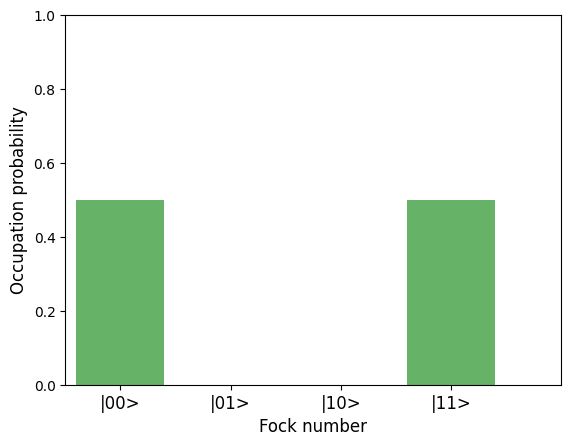

In [9]:

#label the bell and plot the TLS
labels = ["|00>", "|01>", "|10>", "|11>"]
plot_fock_distribution(bell, labels)
plt.show()


In [10]:
#adding time
times = np.linspace(0, 100, 100)
H = 0 * tensor(qeye(2), qeye(2))

#decoherence rate (gamma). ideal case = 0
gamma_phase, gamma_relax = 0, 0

#create operators
sm = destroy(2) #destruction (lowering) operator

#collapse operators list
c_ops = []

#qubit 0
c_ops.append(np.sqrt(gamma_relax) * tensor(sm, qeye(2)))   #relaxation
c_ops.append(np.sqrt(gamma_phase) * tensor(sigmaz(), qeye(2)))  #dephasing

#qubit 1
c_ops.append(np.sqrt(gamma_relax) * tensor(qeye(2), sm))
c_ops.append(np.sqrt(gamma_phase) * tensor(qeye(2), sigmaz()))

result = mesolve(H, bell, times, c_ops, [])


/Users/t.neagoe/Documents/projects/TLS Quantum Sensing and Measurement/.venv/lib/python3.13/site-packages/qutip/solver/solver_base.py:598: FutureWarning: e_ops will be keyword only from qutip 5.3 for all solver
  warnings.warn(


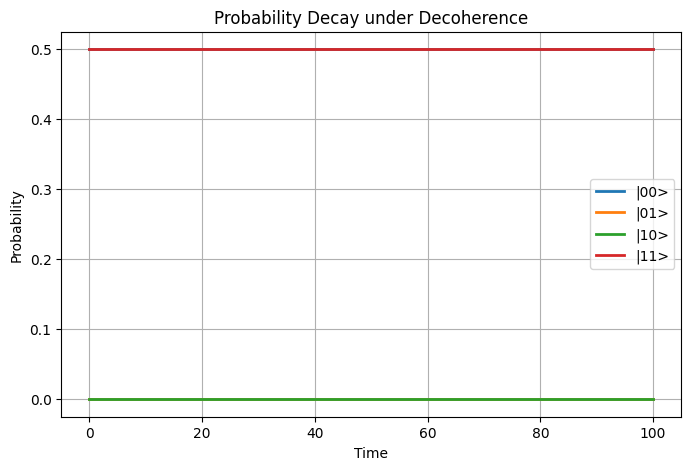

In [11]:
#probability dimensions: 4 states x timesteps
probs = np.zeros((4, len(times)))

#probabilities from density matrix
for t_idx, rho in enumerate(result.states):
    probs[:, t_idx] = np.real(rho.diag())

#plots
plt.figure(figsize=(8, 5))
labels = ["|00>", "|01>", "|10>", "|11>"]

for s_idx in range(4):
    plt.plot(times, probs[s_idx], label=labels[s_idx], linewidth=2)

plt.xlabel("Time")
plt.ylabel("Probability")
plt.title("Probability Decay under Decoherence")
plt.legend()
plt.grid(True)
plt.show()